In [1]:
%matplotlib inline

from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np

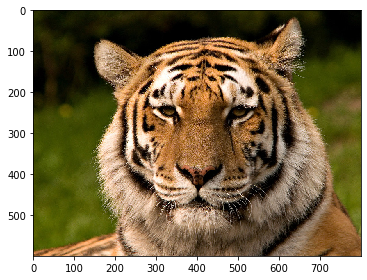

In [2]:
img = imread('images/tiger-color.png')
imshow(img)

In [3]:
img_f = img_as_float(img)

In [4]:
red = img_f[:, :, 0]
green = img_f[:,:, 1]
blue = img_f[:,:, 2]

In [5]:
y = 0.2126 * red + 0.7152 * green + 0.0722 * blue
u = -0.0999 * red - 0.336 * green + 0.4360 * blue
v = 0.615 * red - 0.5586 * green - 0.0563 * blue

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


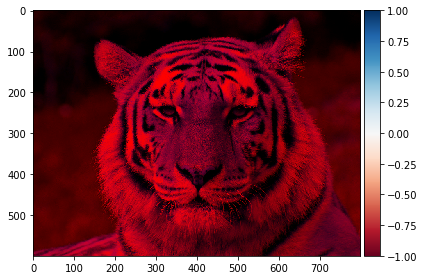

In [6]:
imshow(np.dstack((y,u,v)))

In [7]:
n_pix = y.size
k = round(0.05 * n_pix)

In [8]:
sorted_y = np.sort(y.ravel())
y_min = sorted_y[k]
y_max = sorted_y[-k]

In [9]:
y_max

0.7923184313725489

In [10]:
contrast_y = (y - y_min) * (1. / (y_max - y_min))

In [11]:
contrast_y = np.clip(contrast_y, 0, 1)

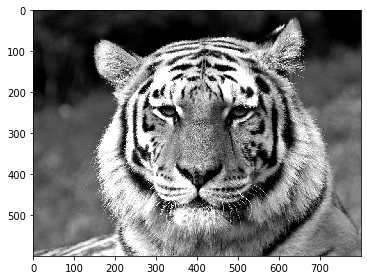

In [12]:
imshow(contrast_y)

In [13]:
new_red = contrast_y + 1.2803 * v
new_green = contrast_y - 0.2148 * u - 0.3805 * v
new_blue = contrast_y + 2.1279 * u

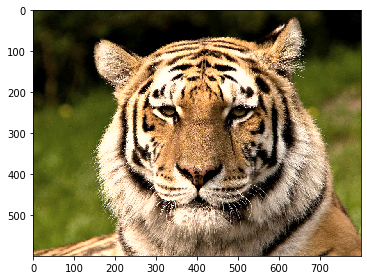

In [14]:
contrast_img = np.dstack((new_red, new_green, new_blue))
contrast_img = np.clip(contrast_img, 0, 1)
contrast_img = img_as_ubyte(contrast_img)
imshow(contrast_img)

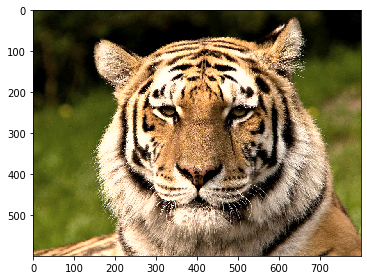

In [15]:
true_img = imread('images/tiger-stable-contrast.png')
imshow(true_img)

In [20]:
np.array_equal(contrast_img, contrast_img)

True